In [1]:
import numpy as np


#加载数据
def load_data(file_name):
    with open(file_name) as fr:
        lines = fr.readlines()

    x = np.empty((len(lines), 2), dtype=float)

    for i in range(len(lines)):
        line = lines[i].split('\t')
        x[i] = line

    return x


x = load_data('简单数据.txt')
x[:5], x.shape

(array([[ 1.658985,  4.285136],
        [-3.453687,  3.424321],
        [ 4.838138, -1.151539],
        [-5.379713, -3.362104],
        [ 0.972564,  2.924086]]),
 (80, 2))

In [2]:
#定义常量
N, M = x.shape

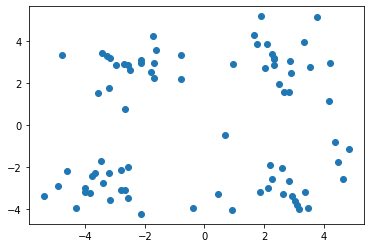

In [3]:
from matplotlib import pyplot as plt


#画图
def draw(cent=None, pred=None):
    plt.scatter(x[:, 0], x[:, 1], c=pred)

    if cent is not None:
        plt.scatter(cents[:, 0], cents[:, 1], c='red', s=100)

    plt.show()


draw()

In [4]:
def distance(x1, x2):
    return np.sum(np.abs(x1 - x2))


distance(x[0], x[1])

5.9734869999999995

[[-0.79983619  1.88628731]
 [-4.24430882 -1.97829499]
 [ 1.7312281  -0.28369848]
 [ 2.0442153  -2.28675645]]


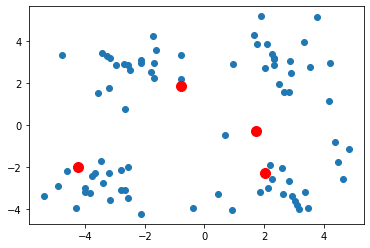

In [5]:
#随机初始化k个中心点
def rand_cent(k):

    cent = np.empty((k, M))
    for col in range(M):
        cent[:, col] = np.random.uniform(low=x[:, col].min(),
                                         high=x[:, col].max(),
                                         size=(k))
    return cent


cents = rand_cent(4)
print(cents)

draw(cents)

In [6]:
def predict(xi, cents):
    min_ki = 0
    min_d = np.inf
    for ki in range(len(cents)):
        d = distance(xi, cents[ki])
        if d < min_d:
            min_d = d
            min_ki = ki
    return min_ki, min_d


predict(x[0], rand_cent(4))

(3, 2.992805354830718)

[[ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]]


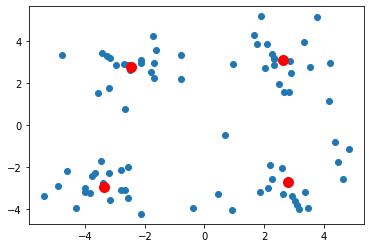

In [7]:
def get_cents(k):

    #随机初始化k个中心点
    cents = rand_cent(k)

    #循环训练
    pred = np.zeros(N)
    changed = True
    while changed:
        changed = False

        #把每个点都归类到某种中心点
        for i in range(N):
            ki,d = predict(x[i],cents)

            if pred[i] != ki:
                changed = True
            pred[i] = ki

        #重新计算中心点的位置,为属于自己的点的均值
        for ki in range(k):
            x_ki = x[pred == ki]
            cents[ki] = np.mean(x_ki, axis=0)
    return cents


cents = get_cents(4)
print(cents)

draw(cents)

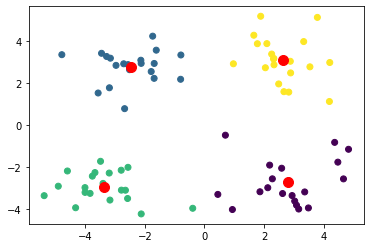

In [8]:
#画图
y = np.empty(N)
for i in range(N):
    y[i], _ = predict(x[i], cents)
draw(cents, y)